# Python에서 SQLite의 사용

In [1]:
# 1. Import the sqlite module
import sqlite3

# 2. Connect to the database with a given name
conn = sqlite3.connect("/Users/ihyeongseob/Desktop/인천대/3학년/2학기/데이터베이스/SQL_실습/admission.db")

# 3. Get a cursor object
cursor = conn.cursor()

# 4. Execute the query
result = cursor.execute("SELECT * FROM STUDENT")
result.fetchone() # tuple 1개를 return (cursor는 pointer임)
result.fetchone() # tuple 1개를 return (cursor는 그 다음 tuple을 가리킴. 그 tuple을 읽어옴)

result = cursor.execute("SELECT * FROM APPLY")
result.fetchall() # tuple의 list를 return

# 5. Close the connection
conn.close()

# Transaction 처리

In [2]:
# 1. Import the sqlite module
import sqlite3

# 2. Connect to the database with a given name
conn = sqlite3.connect("/Users/ihyeongseob/Desktop/인천대/3학년/2학기/데이터베이스/SQL_실습/admission.db")

# 3. Get a cursor object
cursor = conn.cursor()

mydata = (888, "Hyungseop", 4.5, 12000)
cursor.execute("insert into Student values (?, ?, ?, ?)", mydata)

In [3]:
yourdata = (999, "Minchul", 3.5, 1000)
cursor.execute("insert into Student values (?, ?, ?, ?)", yourdata)

# 여기까지는 실제로 Disk상에 안전하게 저장되어 있는 상태는 아니다.
# data buffer에 저장되어 있는 상태이다.
# 안전하기 저장하기 위해서 commit()을 해야 한다.

## commit하여 Disk에 저장하기

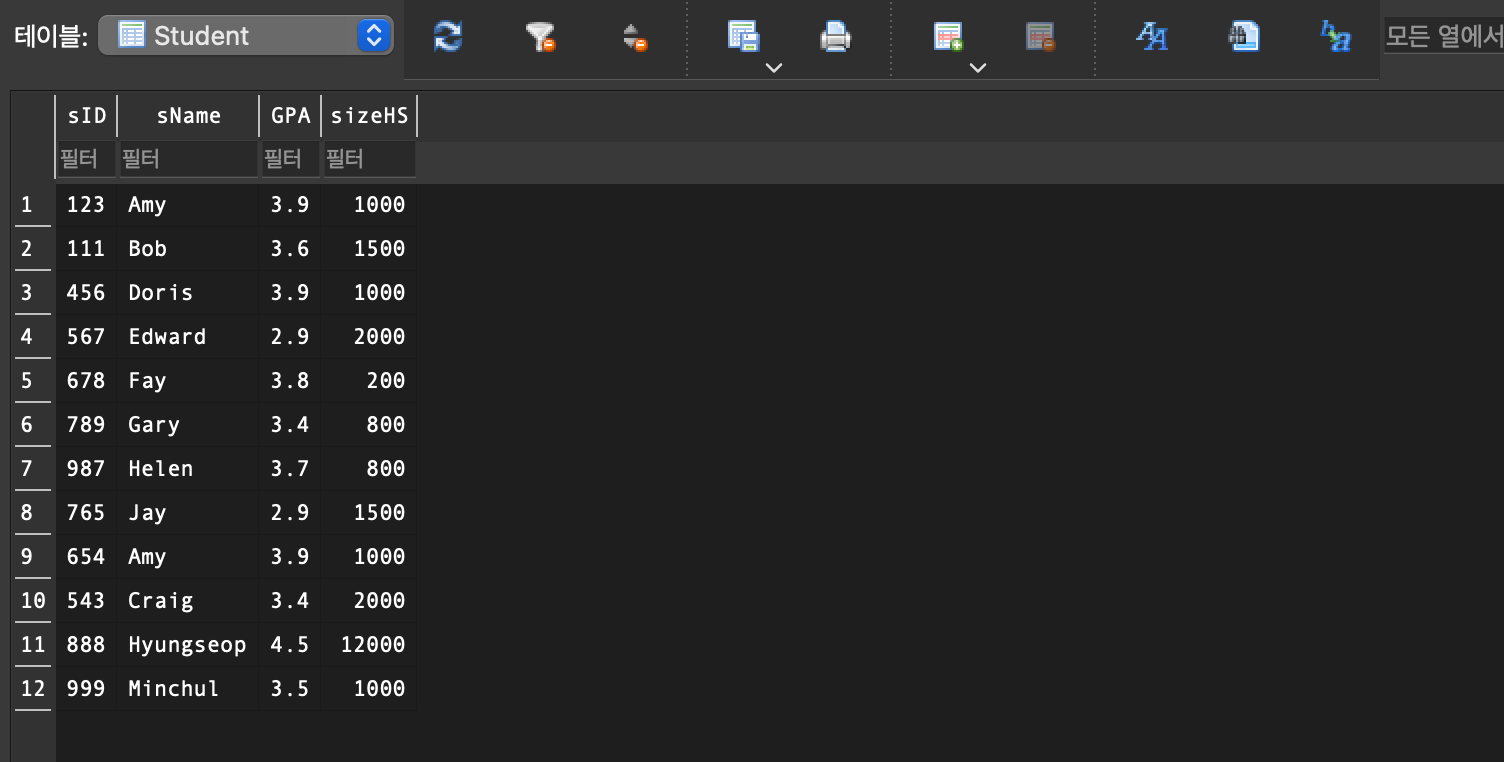

In [4]:
conn.commit()

In [5]:
cursor.execute("delete from Student where sID = 999")

* 아직 지워지지 않은 상태
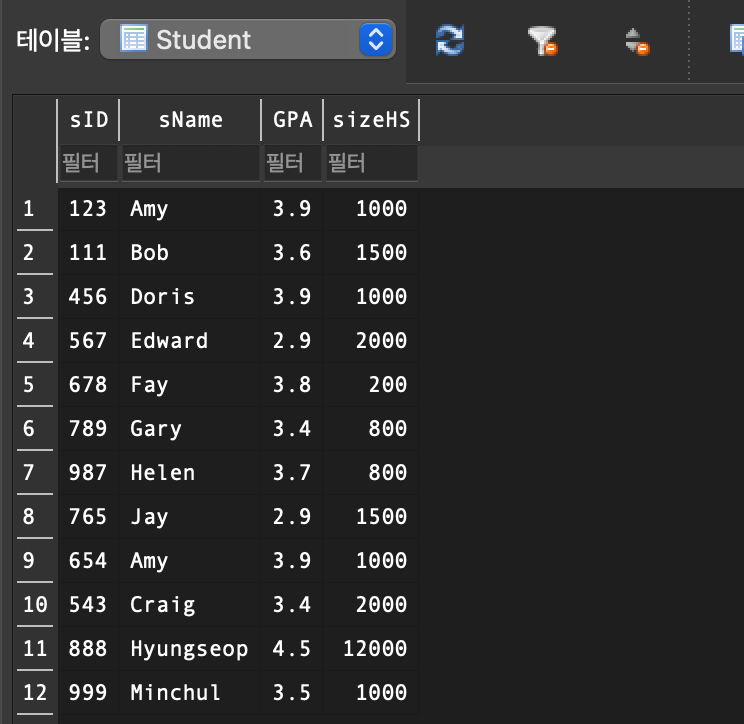

## rollback을 이용하여 이전 commit으로 돌아가기

In [8]:
result = cursor.execute("select * from Student")
result.fetchall() # sID = 999인 tuple이 삭제되었음을 확인할 수 있다.

# 하지만 transaction이 완료된 것은 아니다.

[(123, 'Amy', 3.9, 1000),
 (111, 'Bob', 3.6, 1500),
 (456, 'Doris', 3.9, 1000),
 (567, 'Edward', 2.9, 2000),
 (678, 'Fay', 3.8, 200),
 (789, 'Gary', 3.4, 800),
 (987, 'Helen', 3.7, 800),
 (765, 'Jay', 2.9, 1500),
 (654, 'Amy', 3.9, 1000),
 (543, 'Craig', 3.4, 2000),
 (888, 'Hyungseop', 4.5, 12000)]

In [9]:
# 만약 sID = 999인 tuple을 다시 복구하고 싶다면?
# 이전 commit으로 돌아가서 sID = 999인 tuple을 삭제하기 전으로 돌아간다

conn.rollback()

In [10]:
result = cursor.execute("select * from Student")
result.fetchall() # sID = 999인 tuple이 복구되었음을 확인할 수 있다.

[(123, 'Amy', 3.9, 1000),
 (111, 'Bob', 3.6, 1500),
 (456, 'Doris', 3.9, 1000),
 (567, 'Edward', 2.9, 2000),
 (678, 'Fay', 3.8, 200),
 (789, 'Gary', 3.4, 800),
 (987, 'Helen', 3.7, 800),
 (765, 'Jay', 2.9, 1500),
 (654, 'Amy', 3.9, 1000),
 (543, 'Craig', 3.4, 2000),
 (888, 'Hyungseop', 4.5, 12000),
 (999, 'Minchul', 3.5, 1000)]

In [11]:
conn.close()